In [1]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [3]:

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')

rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')


In [4]:

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])


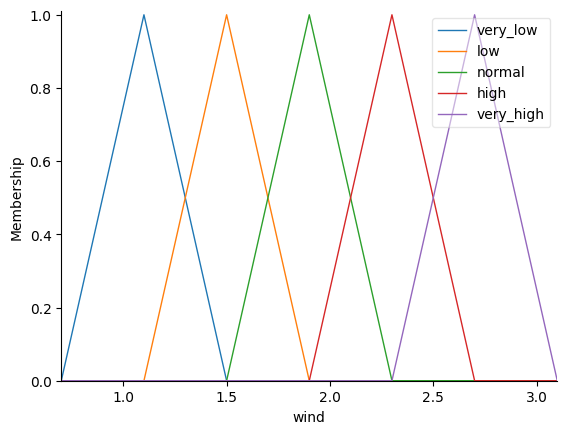

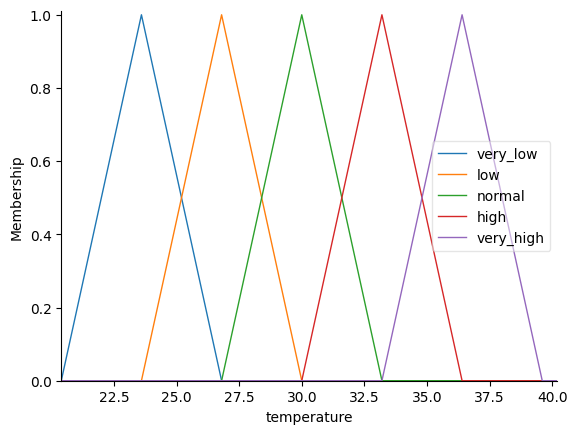

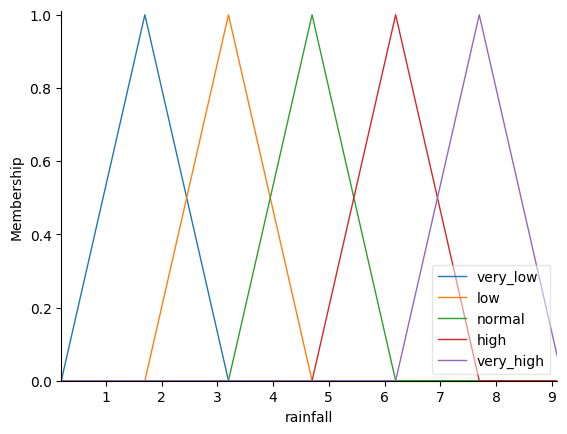

In [5]:
wind.view()
temperature.view()
rainfall.view()


In [7]:
rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['low'])
rule2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['normal'])
rule3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['high'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['very_high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_low'])
rule6 = ctrl.Rule(wind['normal'] & temperature['high'], rainfall['normal'])
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)


Dự báo lượng mưa: 6.20 mm


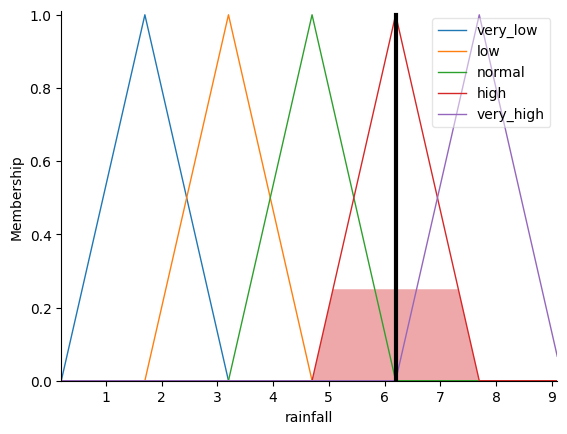

In [8]:
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30

rainfalling.compute()
print(f"Dự báo lượng mưa: {rainfalling.output['rainfall']:.2f} mm")

rainfall.view(sim=rainfalling)
